# Feature Engineering - Part 1 - IMPUTATION TECHNIQUES

Feature engineering efforts mainly have two goals:
   1. Preparing the proper input dataset, compatible with the machine learning algorithm requirements.
   2. Improving the performance of machine learning models.

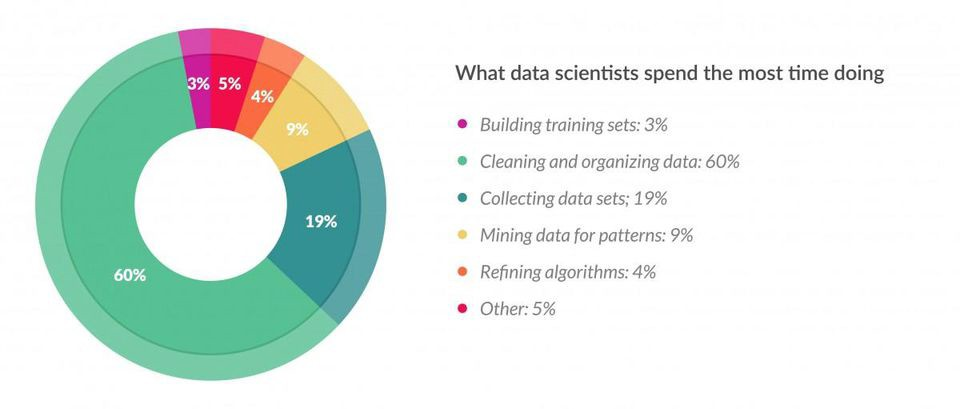

Source: https://www.forbes.com/sites/gilpress/2016/03/23/data-preparation-most-time-consuming-least-enjoyable-data-science-task-survey-says/

There is no guideline which techniques to follow as part of Feature engineering; best way to achieve expertise in feature engineering is practicing different techniques on various datasets and observing their effect on model performances
    
    1.Imputation - Filling Missing Values instead of deleting
    2.Handling Outliers - Detect and handle positive and negative outliers
    3.Binning
    4.Log Transform
    5.Type Encoding - Convert categorical values into numerical values
    6.Grouping Operations
    7.Feature Split
    8.Scaling
    9.Extracting Date

# Imputation

The most simple solution to the missing values is to drop the rows or the entire column. There is not an optimum threshold for dropping but you can use 70% as an example value and try to drop the rows and columns which have missing values with higher than this threshold.

Data Source: https://www.kaggle.com/c/titanic/data?select=train.csv

In [3]:
# Import Libraries
import pandas as pd
import numpy as np
df = pd.read_csv('C:\\EBS\\0. Python\\Data Science with Python\\Feature Engineering\\titanic.csv',sep=',')

In [2]:
# List all columns name
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [3]:
# See sample of dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# display general statistical information about numerical column
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# Disaply information about each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### missingno Library 

It provides a small toolset of flexible and easy-to-use missing data visualizations and 
utilities that allows you to get a quick visual summary of the completeness (or lack thereof) of your datase

conda install -c conda-forge missingno

<AxesSubplot:>

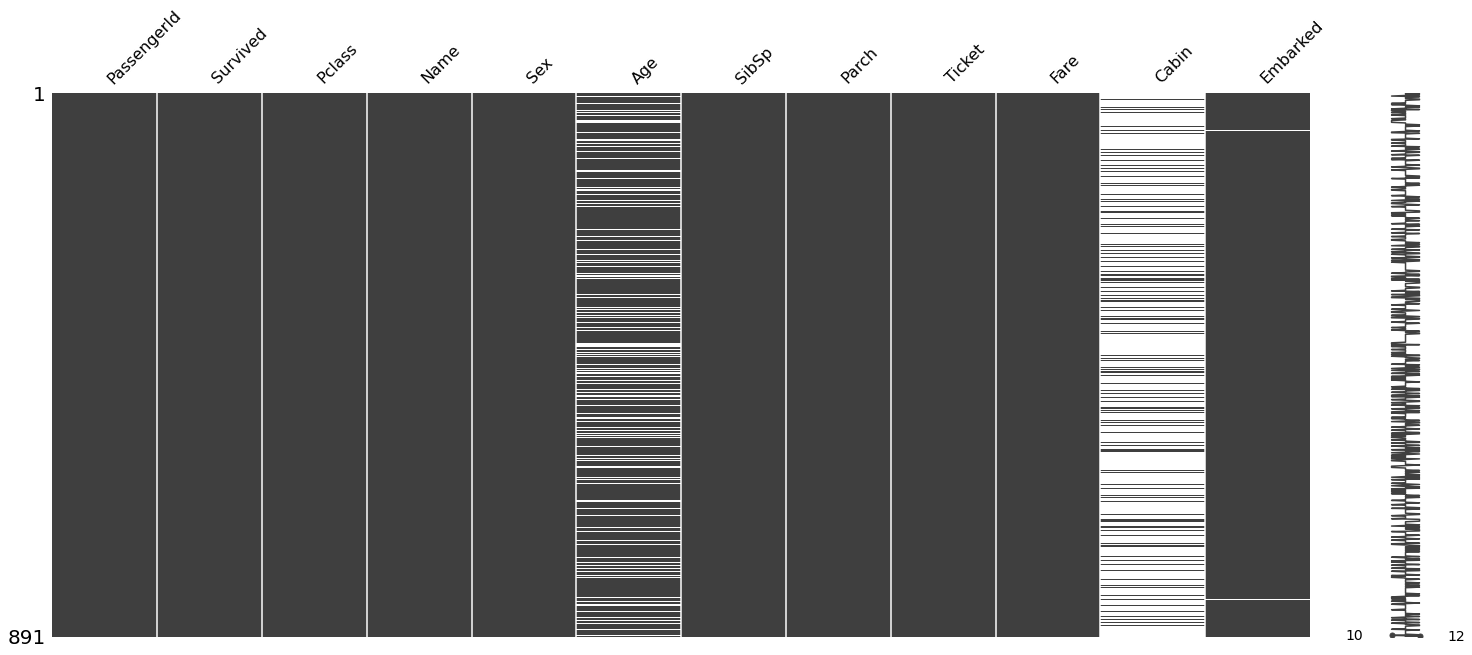

In [6]:
# Heatmap to see missing values at a Glance
import missingno as msno
msno.matrix(df)

In [7]:
# Number of Missing values under 'Age' column
df['Age'].isnull().sum()

177

In [8]:
# Calculate the % of missing value in 'Age' column 
df['Age'].isnull().mean()

0.19865319865319866

In [9]:
# Calculate the % of missing value in 'Cabin' column
df['Cabin'].isnull().mean()
# In this case we can remove this column and try to predict the model output

0.7710437710437711

In [10]:
# Dropping columns with missing value rate higher than threshold (70%)
df = df[df.columns[df.isnull().mean() < .7]]
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [11]:
# Dropping rows with missing value rate higher than threshold (70%)
df = df.loc[df.isnull().mean(axis=1) < .7]
df
# In this case no row gets dropped

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


# 3 Kinds of Missing Value :

## 1. Missing not at random (MNAR) - nonignorable

For example, Temperature sensor works properly until a certain threshold and over this latter, it stops working and thus generates missing values. With the following illustration, by moving the temperature threshold (using the red bar), you can see temperature values becoming missing and also please note the difference between the distribution of missing and non-missing values.
In this case, missing values are said to be Missing Not At Random, i.e. the probability of a variable to be missing depends on the variable itself

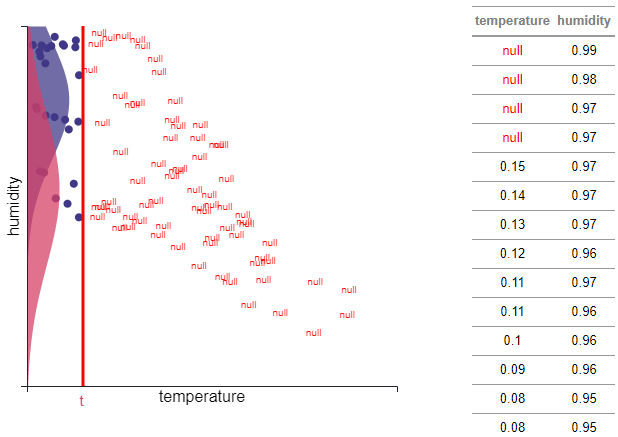


## 2. Missing At Random - MAR

Lets take a new temperature sensor that works under any temperature, thus it doesn't generate missing values as before. Unluckily, it appears that this one doesn't work above a certain humidity level! So this time, over a particular humidity threshold the temperature sensor stops working, and data become missing. With the following illustration, by moving the humidity threshold (using the red bar), you can see the temperature value becoming missing.
In this case, missing values are said to be Missing At Random, i.e. the probability of a variable to be missing depends on all variables (here the humidity).
Please note that the difference between the distribution of missing and non-missing values is quite the same as in the previous Missing Not At Random (MNAR) section. One important conclusion is that MNAR and MAR are can not be distinguished from each other.

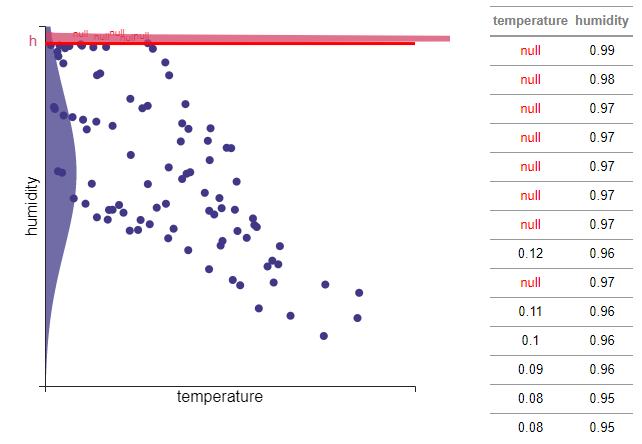

## 3. Missing Completely at Random - MCAR
I've already bought 2 temperature sensors, but let's buy a third one! This one works finally under any temperature or humidity conditions. But it's just crap and just drops some measurement at random. In the collected data, nothing can explain why it sometimes just doesn't send data. In this case, missing values are said to be Missing Completely at Random, i.e. the probability of a variable to be missing . Now, the distribution of missing and non-missing values overlaps and therefore it is easy to distinguish MCAR from MAR/MNAR.does not depends on other variables, nor on the variable itself.

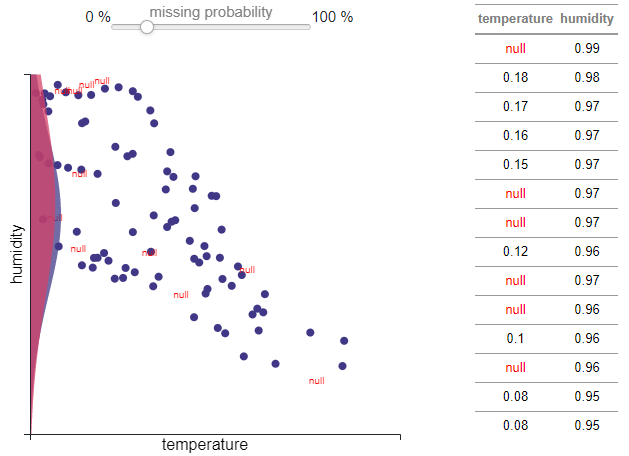

Source: https://www.craft.ai/blog/missing-values

## Different way of handling missing values
1. Delete column which contains missing values above defined threshold
2. Delete entire row which contains missing values above defined threshold 
3. Mean/Median/Mode Imputation - You can apply in case of MCAR type of missing data
4. Random Sample Imputation - You can apply in case of MCAR type of missing data
5. Capturing NaN values with a new feature - You can apply in case of MNAR type of missing data
6. End of Distribution imputation - You can apply in case of MNAR type of missing data
7. Arbitrary imputation - You can apply in case of MNAR type of missing data

# ***** Numerical Imputation *****

If you have a column that only has 1 and NA, then it is likely that the NA rows correspond to 0. 
For another example, if you have a column that shows the “customer visit count in last month”, the missing values might be replaced with 0 as long as you think it is a sensible solution

Except for these case of having a default value for missing values, Alternate imputation way is to use the mean (in case of no outlier)/medians(in case of outlier data exists) of the column

   ## Mean/Median/Mode Imputation

In [12]:
# No of Null Values present in 'Age' Column
df['Age'].isnull().sum()

177

<AxesSubplot:>

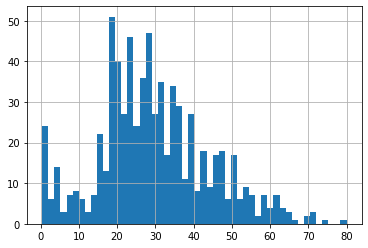

In [13]:
# Plotting histogram for 'Age' 
df['Age'].hist(bins=50)

C:\Users\DasAm\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

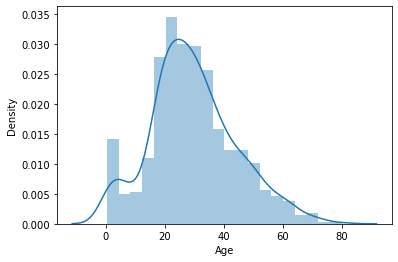

In [14]:
# Plotting histogram for 'Age' using Seaborn library
import seaborn as sns
sns.distplot(df['Age'])

In [15]:
# Introduce new column and replace Null values with Mean of observed Age value present in the column 
df['Age_Mean']=df['Age'].fillna(df['Age'].mean())

In [16]:
# Check if there is any null value present in Age column after imputation
df['Age_Mean'].isnull().sum()

0

C:\Users\DasAm\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age_Mean', ylabel='Density'>

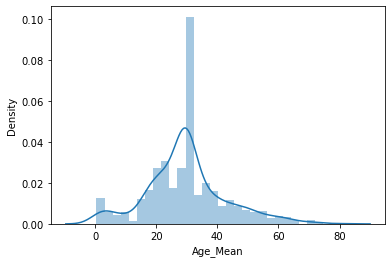

In [17]:
# Plotting histogram for 'Age' after imputation and observe spike in Density of Age value around mean
sns.distplot(df['Age_Mean'])

<AxesSubplot:ylabel='Density'>

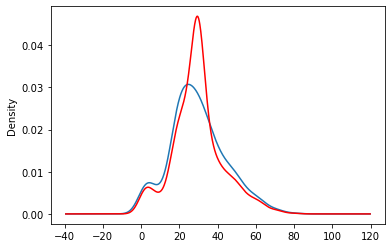

In [35]:
# Comparing 'Age' and 'Age_Mean' after imputation and observe spike in Density of Age value around mean
import matplotlib.pyplot as plt
df['Age'].plot(kind='kde') # kde - Kernel density estimator
df['Age_Mean'].plot(kind='kde',color='red')

In [22]:
# Alternatively we can use Median if there is any outlier data present in Age column as outliers may influence mean
df['Age']= df['Age'].replace(np.NaN, df['Age'].median())

Pros:
   1. Prevent data loss which results in deletion of rows or columns; Faster way to obtain complete dataset.
   2. Works well with a small dataset and easy to implement.
   3. Robust to outliers - the mean is very susceptible to outliers (it's non-robust), while the median is not affected by outliers (it's robust). 

Cons:
   1. Works only with numerical continuous variables (you can use mode/count for categorical variables)
   2. Can cause data leakage
   3. It impacts correlation - does not factor the covariance between features
   4. Change or distortion in the original variance, standard deviation

## Random Sample Imputation

Random sampling imputation consists of extracting random observations from the pool of available values in the variable. samples are randomly drawn from the dataset for imputing the missing value

In [19]:
# Sample dataset
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_Mean
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,22.000000
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,38.000000
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,26.000000
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,35.000000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,35.000000
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q,29.699118
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,54.000000
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,2.000000
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,27.000000
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,14.000000


In [20]:
# Infomation about columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
 11  Age_Mean     891 non-null    float64
dtypes: float64(3), int64(5), object(4)
memory usage: 90.5+ KB


In [21]:
# Check NaN value count in each column
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
Age_Mean         0
dtype: int64

In [22]:
# Check Not-Null count of Age column
df['Age'].dropna().count()

714

In [23]:
# Create a dataframe with Age value picked up randomly from not null Age values from oroginal dataset 
random_sample=df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)
# This will randomly picked 177 sample Age value from 714 data

In [24]:
# Display sample Age considered randomly with their corresponding index
random_sample

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [25]:
# List of Index from original dataset where NaN value present under Age column
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [26]:
# List of Index from randomly selected 177 data with sample Age
random_sample.index

Int64Index([423, 177, 305, 292, 889, 595, 637,  54, 456, 110,
            ...
            179,  24, 630, 458,  49, 539, 267, 352,  99, 689],
           dtype='int64', length=177)

In [27]:
# Update the index of Random sample Dataframe to match the index of original dataset where NaN value presents under Age column
random_sample.index=df[df['Age'].isnull()].index

In [28]:
# Now Index value of random_sample are same as original data set where NaN value presents under Age column
random_sample.index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [29]:
# We need to perform above steps as Pandas required to have same index in order to merge the dataset
# Step 1. Add one column to update random age value and copy over all 'not Null' and 'NaN' values 
df['Age_Random'] = df['Age']
# Step 2. Then update 177 NaN value in one shot with Sample value pulled randomly (stored as random_sample dataframe)
df.loc[df['Age'].isnull(),'Age_Random']=random_sample

In [123]:
# Observe below data at index 5,17,19 where originally Age column contains NaN value and updated with random value after imputation
df.head(20)

,Age,Fare,Embarked,Age_random
0,22.0,7.2500,S,22.00
1,38.0,71.2833,C,38.00
2,26.0,7.9250,S,26.00
3,35.0,53.1000,S,35.00
4,35.0,8.0500,S,35.00
5,NaN,8.4583,Q,28.00
6,54.0,51.8625,S,54.00
7,2.0,21.0750,S,2.00
8,27.0,11.1333,S,27.00
9,14.0,30.0708,C,14.00


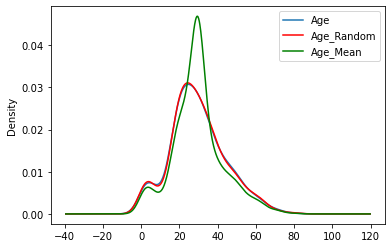

In [36]:
# Comparing 'Age' ,'Age_Mean' , 'Age_Random' after imputation and observe Age_Random is converged with Age 
# which helped in retaining variance and standard deviation of the Age value in dataset
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde')
df['Age_Random'].plot(kind='kde',color='red')
df['Age_Mean'].plot(kind='kde',color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

Pros:
   1. Easy to implement
   2. Less distortion in variance/standard deviation 

Cons:
   1. Randomness won't work in every situation

## Capturing NaN Values with new feature

In [39]:
# Lets load the titanic data set with selective columns for simplicity
df = pd.read_csv('C:\\EBS\\0. Python\\Data Science with Python\\Feature Engineering\\titanic.csv',sep=',',usecols = ['Age','Fare','Survived'])
df.head(10)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
5,0,NaN,8.4583
6,0,54.0,51.8625
7,0,2.0,21.0750
8,1,27.0,11.1333
9,1,14.0,30.0708


In [50]:
# Add 'Age_NaN' feature and Replace NaN value as 1 and non null value as 0
df['Age_NaN'] = np.where(df['Age'].isnull(),1,0)
df

,Survived,Age,Fare,Age_NaN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
...,...,...,...,...
886,0,27.0,13.0000,0
887,1,19.0,30.0000,0
888,0,NaN,23.4500,1
889,1,26.0,30.0000,0


#### In this technique, we are creating additional Feature to capture the missingness of data and give importance to missing value as 1
We would still go ahead and keep 'Age' feature as additional feature and may replace NaN value with Mean/Median or random sample. However,  Age_NaN feature will give additional importance to missing value 

Pros:
 1. Easy to implement
 2. Give importance to missing values

Cons:
 1. Creating additional features - Curse of dimensionality ( would be problematic in case there are many features in original dataset with missing values)

## End of Distribution imputation

If there is suspicion that the missing value is not at random then capturing that information is important. In this scenario, one would want to replace missing data with values that are at the tails of the distribution of the variable

In [4]:
# Lets load the titanic data set with selective columns for simplicity
df = pd.read_csv('C:\\EBS\\0. Python\\Data Science with Python\\Feature Engineering\\titanic.csv',sep=',',usecols = ['Age','Fare','Survived'])
df.head(10)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
5,0,NaN,8.4583
6,0,54.0,51.8625
7,0,2.0,21.0750
8,1,27.0,11.1333
9,1,14.0,30.0708


<AxesSubplot:>

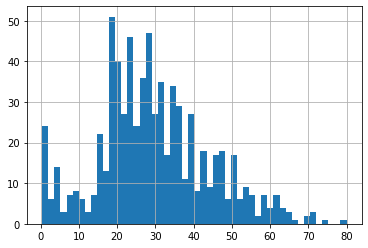

In [52]:
# Plotting histogram to see distribution of Age feature
df['Age'].hist(bins=50)

<AxesSubplot:>

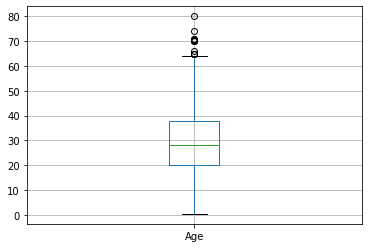

In [6]:
# Boxplotting to see outliers of Age features
df.boxplot(column='Age')


In [68]:
# Calculate InterQuantile
IQR = df['Age'].quantile(.75) - df['Age'].quantile(.25)
IQR

17.875

In [70]:
# Calculate the upper boundary as displayed in Box Plot
upper_boundary = df['Age'].quantile(.75) + 1.5*IQR
upper_boundary

64.8125

In [72]:
# Calculate max value of Age distribution using [ Mean + (3*Standard Deviation)] formulation for Gaussian distribution
extreme_value = df['Age'].mean()+3*df['Age'].std()
extreme_value

73.27860964406095

In [74]:
# Adding new feature with replacing all NaN values with Extreme values which is call End of Distribution
df['Age_End_Distribution'] = df['Age'].fillna(extreme_value)
# Alternatively we can use below:
# df['Age_End_Distribution'] = df['Age'].replace(np.NaN,extreme_value)
df

,Survived,Age,Fare,Age_End_Distribution
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
...,...,...,...,...
886,0,27.0,13.0000,27.00000
887,1,19.0,30.0000,19.00000
888,0,NaN,23.4500,73.27861
889,1,26.0,30.0000,26.00000


#### NOTE:
We would still go ahead and keep 'Age' feature as additional feature and may replace NaN value with Mean/Median or random sample. However,  Age_End_Distribution feature will give additional importance to missing value 

<AxesSubplot:>

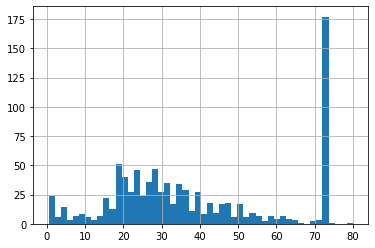

In [77]:
# Plotting histogram to see distribution of Age_End_Distribution feature after replacing with Extreme value
df['Age_End_Distribution'].hist(bins=50)

<AxesSubplot:>

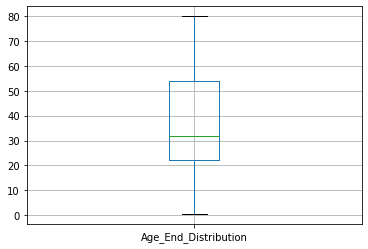

In [78]:
# Boxplotting to see outliers of Age_End_Distribution feature - There wont be any outlier as NaN values are replaced with extreme value
df.boxplot(column='Age_End_Distribution')

Pros:
1. Easy to implement
2. Capture the importance of missingness  (if one suspects the missing data is valuable)

Cons:
1. Distort the original distribution of the feature variable
2. If missingmess is not important, it may mask the predictive power of the original variables by distorting the distribution
3. If presence of NaN value in a feature is high , it will mask true outliers in the distribution
4. If presence of NaN value in a feature is low, the replaced NaN may be considered an outlier and pre-processed in a subsequent step of feature engineering 

## Abritrary Imputation

Arbitrary value imputation consists of replacing all occurrences of missing values (NA) within a variable by an arbitrary value

Assumptions:
1. Data is not missing at random.
2. If this is the case, we want to flag the missing values with a different (arbitrary) value, instead of replacing those occurrences with the mean or the median, which represent the most common value.

<AxesSubplot:ylabel='Density'>

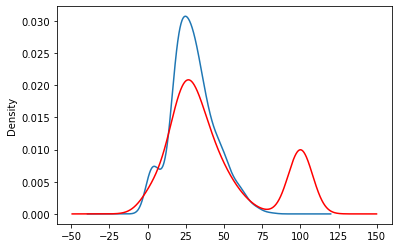

In [79]:
# Replace NaN value with any arbitary value which is not so frequent in the feature - In this case, we choose 100 as Arbitary value
df['Age_Arbitary'] = df['Age'].fillna(100)
df['Age'].plot(kind='kde')
df['Age_Arbitary'].plot(kind='kde',color='red')

Pros :
1. Easy to implement
2. Fast way of obtaining complete datasets
3. Can be integrated into production (during model deployment)
4. Captures the importance of “missingness” if there is one

Cons:
1. Distortion of the original variable distribution
2. Distortion of the original variance
3. Distortion of the covariance with the remaining variables of the dataset
4. If the arbitrary value is at the end of the distribution it may mask or create outliers
5. Hard to decide which value to use as arbitary value

# ***** Categorical Imputation *****

In [109]:
# Import Libraries
import pandas as pd
import numpy as np
df = pd.read_csv('C:\\EBS\\0. Python\\Data Science with Python\\Feature Engineering\\loan.csv',sep=',')

In [110]:
# All Column name
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [111]:
# Sample Data
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [112]:
# For simplicity , Update dataframe with selective categorical independent features and dependent feature
df = pd.read_csv('C:\\EBS\\0. Python\\Data Science with Python\\Feature Engineering\\loan.csv',sep=',',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [113]:
df

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
...,...,...,...,...
1455,Gd,TA,Attchd,175000
1456,Gd,TA,Attchd,210000
1457,TA,Gd,Attchd,266500
1458,TA,NaN,Attchd,142125


In [114]:
# Check the null value count in each features 
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [115]:
# Check % of missing values in ascending order
df.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

### 1. Replace NaN with most frequent value of a feature

In [116]:
# get the count of each unique value presents in BsmtQual Feature
df.groupby(df['BsmtQual'])['BsmtQual'].count()

BsmtQual
Ex    121
Fa     35
Gd    618
TA    649
Name: BsmtQual, dtype: int64

In [117]:
# Alternate way to get the count of each unique value presents in BsmtQual Feature
df['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

<AxesSubplot:>

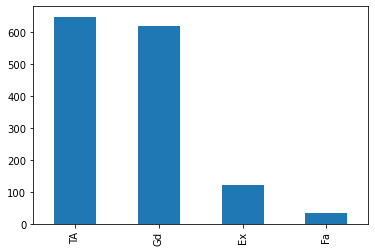

In [118]:
# you can plot to visualize the frequency distribution
df['BsmtQual'].value_counts().plot(kind='bar')

In [119]:
df['BsmtQual'].value_counts().index[0]

'TA'

In [120]:
# Alternatively we can use mode() to find most frequent value of a feature
df['BsmtQual'].mode()[0]

'TA'

In [124]:
# Create a function to replace the NaN value with most frequent value of the feature
def replace_NaN_with_most_frequent(df,feature_name):
    print("most frequent Value of {feature} is {value}".format(feature=feature_name,value=df[feature_name].value_counts().index[0]))
    df[feature_name]=df[feature_name].fillna(df[feature_name].value_counts().index[0])

In [125]:
# Call the function to replace NaN value with most frequent value of a feature
categorical_features=['BsmtQual','FireplaceQu','GarageType']
for feature in categorical_features:
    replace_NaN_with_most_frequent(df,feature)

most frequent Value of BsmtQual is TA
most frequent Value of FireplaceQu is Gd
most frequent Value of GarageType is Attchd


In [126]:
# Now check if there is any NaN value present in Categorical Features
for feature in categorical_features:
    print("Count of NaN Value in {} is {}".format(feature,df[feature].isnull().sum()))

Count of NaN Value in BsmtQual is 0
Count of NaN Value in FireplaceQu is 0
Count of NaN Value in GarageType is 0


All NaN value are replaced with most frequent value of each feature

If there is two value with same frequency , you can consider any one of them

Pros:
   1. Easy and quick to implement

Cons:
   1. Since we are using most frequent value , it may use them in an over represented way if there are large number of NaN
   2. It distorts the relation of the most frequent value 

### 2. Adding a new feature to capture NaN

In [128]:
# For simplicity , Update dataframe with selective categorical independent features and dependent feature
df = pd.read_csv('C:\\EBS\\0. Python\\Data Science with Python\\Feature Engineering\\loan.csv',sep=',',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [129]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [132]:
# Adding a new column to give importance to missing values of a feature by replacing value 1 for missing value and 0 as non null value
df['BsmtQual_New'] = np.where(df['BsmtQual'].isnull(),1,0)

In [133]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_New
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [134]:
# We can still go ahead and use most frequent value for original feature i.e., BsmtQual
df['BsmtQual'].fillna(df['BsmtQual'].mode()[0],inplace=True)

In [135]:
# There should not be any NaN value under BsmtQual feature
df['BsmtQual'].isnull().sum()

0

In [139]:
# All NaN are replaced with 'TA' under BsmtQual and 1 under BsmtQual_New column
df[df['BsmtQual_New']==1].head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_New
17,TA,NaN,CarPort,90000,1
39,TA,NaN,NaN,82000,1
90,TA,NaN,Detchd,109900,1
102,TA,NaN,Attchd,118964,1
156,TA,NaN,Detchd,109500,1


### 3. Replace NaN value with new value 

In [141]:
# For simplicity , Update dataframe with selective categorical independent features and dependent feature
df = pd.read_csv('C:\\EBS\\0. Python\\Data Science with Python\\Feature Engineering\\loan.csv',sep=',',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [142]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [149]:
# Replacing NaN value with new value as 'missing' - you can use any other categorical value to represent NaN
df['BsmtQual'] = df['BsmtQual'].fillna('missing')
df.head(20)

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
5,Gd,NaN,Attchd,143000
6,Ex,Gd,Attchd,307000
7,Gd,TA,Attchd,200000
8,TA,TA,Detchd,129900
9,TA,TA,Attchd,118000


#### NOTE: This is one of the most frequently used technique for Categorical Imputation

Resources: Krish Naik's Youtube Channel